<a href="https://colab.research.google.com/github/Vishal0Nagarajan/Flight-Delay-Prediction/blob/master/TwoStage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

import pandas as pd
import csv
import numpy as np
import xgboost as xgb
import statistics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, scale, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import TomekLinks, NearMiss
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Fetching the dataset (ignoring Future Warnings)

warnings.simplefilter(action = 'ignore', category = FutureWarning)
df = pd.read_csv('drive/My Drive/DataPreprocessing.csv', index_col = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


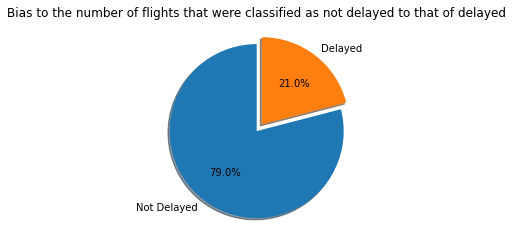

<Figure size 432x288 with 0 Axes>

In [ ]:
ones = len(df[df.ArrDel15==1])
zeroes = len(df[df.ArrDel15==0])
#series = pd.DataFrame({'ArrDel15' : [zeroes, ones]}, index = ['Not Delayed', 'Delayed'])
labels = 'Not Delayed', 'Delayed'
explode = (0, 0.1)
sizes = [float(zeroes/(zeroes+ones))*100, float(ones/(zeroes+ones))*100] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Bias to the number of flights that were classified as not delayed to that of delayed')
plt.savefig('drive/My Drive/pie.eps', bbox_inches = 'tight', format = 'eps', pad_inches = 0)
plt.show()
plt.clf()

In [ ]:
# x, y -> ArrDel15
x = df.copy(deep = True)
y = df.loc[:, ['ArrDel15']]
labelencoder_X = LabelEncoder()
x['airport_y'] = labelencoder_X.fit_transform(x['airport_y'])

In [ ]:
x

,Origin,Dest,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,windspeedKmph_x,DewPointF_x,cloudcover_x,precipMM_x,pressure_x,WindGustKmph_x,visibility_x,weatherCode_x,tempF_x,WindChillF_x,winddirDegree_x,humidity_x,time_x,date_x,airport_x,windspeedKmph_y,DewPointF_y,cloudcover_y,precipMM_y,pressure_y,WindGustKmph_y,visibility_y,weatherCode_y,tempF_y,WindChillF_y,winddirDegree_y,humidity_y,time_y,date_y,airport_y
0,LAX,LAS,2016-11-05,4,2016,11,5,8,0.0,900,0.0,12892,12889,10,1019,0.0,0.0,5,56,18,0.0,1016,6,10,113,64,63,112,79,8,2016-11-05,LAX,3,38,65,0.0,1013,4,10,116,58,56,65,54,10,2016-11-05,7
1,DFW,ATL,2016-11-05,4,2016,11,5,13,0.0,1345,0.0,11298,10397,16,1656,0.0,0.0,21,67,57,0.0,1015,25,10,116,77,76,180,76,13,2016-11-05,DFW,13,59,0,0.0,1022,14,10,113,82,81,110,48,16,2016-11-05,0
2,ATL,CLT,2016-11-05,4,2016,11,5,13,0.0,1340,0.0,10397,11057,14,1457,0.0,0.0,12,60,0,0.0,1023,14,10,113,78,76,109,59,13,2016-11-05,ATL,5,59,48,0.0,1025,6,10,116,72,70,176,67,14,2016-11-05,1
3,CLT,ATL,2016-11-05,4,2016,11,5,15,0.0,1540,0.0,11057,10397,16,1657,0.0,0.0,5,59,34,0.0,1025,6,10,116,74,72,192,64,15,2016-11-05,CLT,13,59,0,0.0,1022,14,10,113,82,81,110,48,16,2016-11-05,0
4,LAX,SEA,2016-11-05,4,2016,11,5,7,0.0,755,0.0,12892,14747,10,1050,0.0,1.0,5,57,20,0.0,1016,6,10,116,64,63,97,81,7,2016-11-05,LAX,15,49,100,0.2,1012,24,6,176,52,48,202,89,10,2016-11-05,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851428,IAH,DFW,2017-10-28,4,2017,10,28,10,0.0,1030,0.0,12266,11298,11,1151,0.0,0.0,6,62,21,0.0,1015,8,10,113,79,79,66,56,10,2017-10-28,IAH,11,53,3,0.0,1016,13,10,113,76,76,141,46,11,2017-10-28,3
1851429,DFW,IAH,2017-10-07,4,2017,10,7,13,0.0,1340,0.0,11298,12266,14,1456,0.0,0.0,12,54,3,0.0,1015,13,10,113,81,81,153,40,13,2017-10-07,DFW,7,65,36,0.0,1013,8,10,116,86,86,99,49,14,2017-10-07,5
1851430,DFW,IAH,2017-10-14,4,2017,10,14,13,0.0,1340,0.0,11298,12266,14,1456,0.0,0.0,12,54,3,0.0,1015,13,10,113,81,81,153,40,13,2017-10-14,DFW,7,65,36,0.0,1013,8,10,116,86,86,99,49,14,2017-10-14,5
1851431,DFW,IAH,2017-10-21,4,2017,10,21,13,0.0,1340,0.0,11298,12266,14,1456,0.0,0.0,12,54,3,0.0,1015,13,10,113,81,81,153,40,13,2017-10-21,DFW,7,65,36,0.0,1013,8,10,116,86,86,99,49,14,2017-10-21,5


In [ ]:
# Training and Test set splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# Saving train and test sets as csv files for future use

x_train1 = x_train.copy(deep = True)
x_train1 = x_train1[x_train1.ArrDel15>0]
'''x_train1.to_csv('drive/My Drive/x_train.csv')
x_test.to_csv('drive/My Drive/x_test.csv')

x_train = x_train.drop(columns = 'ArrDel15')
x_test = x_test.drop(columns = 'ArrDel15')'''

ValueError: ignored

In [ ]:
x_train = x_train.loc[:, ['DepDel15', 'DepDelayMinutes', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
x_test = x_test.loc[:, ['DepDel15', 'DepDelayMinutes', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

KeyError: ignored

In [ ]:
x_train = pd.DataFrame(x_train)
len(x_train[x_train[0]==0])

1300302

In [ ]:
#XGBoost Classifier

x_train = x_train.loc[:, ['DepDel15', 'DepDelayMinutes', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
x_test = x_test.loc[:, ['DepDel15', 'DepDelayMinutes', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
print('Arrival Delay : ')
xg = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.25, random_state = 0)
xg.fit(x_train, y_train.values.ravel())
y_predXG = xg.predict(x_test)
print(classification_report(y_test, y_predXG))
pd.DataFrame(y_predXG).to_csv('drive/My Drive/y_predXG.csv')

Arrival Delay : 
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    365740
         1.0       0.89      0.68      0.78     97119

    accuracy                           0.92    462859
   macro avg       0.91      0.83      0.86    462859
weighted avg       0.92      0.92      0.91    462859



In [ ]:
# Incorporate the Two Staged Predictive Machine Learning Engine

x_train = pd.read_csv('drive/My Drive/x_train.csv', index_col = 0)
x_test = pd.read_csv('drive/My Drive/x_test.csv', index_col = 0)

In [ ]:
y_predXG = pd.read_csv('drive/My Drive/y_predXG.csv', index_col = 0)
y_predXG.rename(columns = {'0': 'y_predXG'}, inplace = True)

In [ ]:
y_train = x_train.ArrDelayMinutes
y_test = x_test.ArrDelayMinutes
y_ground = x_test.ArrDel15
x_train = x_train.loc[:, ['DepDel15', 'ArrDel15', 'DepDelayMinutes', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
x_test = x_test.loc[:, ['DepDel15', 'ArrDel15', 'DepDelayMinutes', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
x_test = x_test.drop(columns = 'ArrDel15')
x_train = x_train.drop(columns = 'ArrDel15')

In [ ]:
# XGBoost Regressor

reg = xgb.XGBRegressor()
reg.fit(x_train, y_train.ravel())
y_predXGR = reg.predict(x_test)
print(r2_score(y_test, y_predXGR),'\n',mean_absolute_error(y_test, y_predXGR),'\n', mean_squared_error(y_test, y_predXGR)**0.5)

[16:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6483449649405916 
 23.12430182389659 
 24.70358394082107


In [ ]:
y_ground.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
y_predXG.reset_index(drop = True, inplace = True)
y_predXGR = pd.DataFrame(y_predXGR)
y_predXGR.reset_index(drop = True, inplace = True)
y_predXGR.rename(columns = { 0 : 'y_predXGR'}, inplace = True)
data = pd.concat([y_ground, y_test, y_predXG, y_predXGR], axis = 1)
data = data[data.y_predXG>0]

In [ ]:
print(classification_report(data.ArrDel15, data.y_predXG), '\n\n')
print('R2   : ', r2_score(data['ArrDelayMinutes'], data['y_predXGR']))
print('MAE  : ', mean_absolute_error(data['ArrDelayMinutes'], data['y_predXGR']))
print('RMSE : ', mean_squared_error(data['ArrDelayMinutes'], data['y_predXGR'])**0.5)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7822
         1.0       0.89      1.00      0.94     66445

    accuracy                           0.89     74267
   macro avg       0.45      0.50      0.47     74267
weighted avg       0.80      0.89      0.84     74267
 


R2   :  0.9442945691748496
MAE  :  13.825922184041072
RMSE :  18.920897095224447


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from statistics import mean, stdev, variance
mean_value_pred1 = mean(data.y_predXGR[data.ArrDel15 == 0])
stdev_value_pred1 = stdev(data.y_predXGR[data.ArrDel15 == 0])
var_value_pred1 = variance(data.y_predXGR[data.ArrDel15 == 0])
print(mean_value_pred1, stdev_value_pred1, var_value_pred1,'\n\n')
mean_value_pred2 = mean(data.ArrDelayMinutes[data.ArrDel15 == 0])
stdev_value_pred2 = stdev(data.ArrDelayMinutes[data.ArrDel15 == 0])
var_value_pred2 = variance(data.ArrDelayMinutes[data.ArrDel15 == 0])
print(mean_value_pred2, stdev_value_pred2, var_value_pred2)

30.726794757857647 4.09762041108128 16.790493033309918 


7.275504985937101 4.913017691853824 24.13774284046868


462859